# Equações diferenciais e o Circuito de Chua

---

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom. Uma cópia deste será automaticamente criada para você no seu Google Drive, você pode usar essa cópia mesmo, sem necessidade de criar outra.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   A atividade vai ser baseada no seu número USP.
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo as perguntas das atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.
*   ❗Exercício 00:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:




###❗Exercício - Assinatura❗

*Assinatura:* Gabriela Ferreira dos Santos



---



## Preliminares

In [1]:
import numpy as np                  #Numpy
import matplotlib.pyplot as plt     # Gráficos/figuras
from prettytable import PrettyTable #Tabelas mais bonitinhas

Referências:
*   https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.01-ODE-Initial-Value-Problem-Statement.html

### ❗Exercício - NUSP❗

Preencha o seu número USP abaixo

In [2]:
# Coloque aqui o seu número USP
nusp = 11820298

nusp_str=str(nusp).replace("0","")

magic_ilong = int(nusp_str)
magic_int = int(str(magic_ilong)[-1:])*10
#magic_int = int(list(set(nusp_str))[0])

print("magic_ilong  =", magic_ilong)
print("magic_int =", magic_int)

magic_ilong  = 1182298
magic_int = 80




---



## O problema de Valor Inicial

Nosso problema em questão é o de achar uma função $u \in \mathcal{C}^1([t_0, T])$, que resolva a equação
$$
u'(t) = f(t,u(t)),
$$
para uma dada função $f(t,u)$, suficientemente suave, considerando conhecido o valor inicial de $u$,
$$
u(t_0)=u_0.
$$

Este problema é conhecido como problema de valor inicial, ou problema de Cauchy.

Observações:
*   A função $u$ pode ser uma função com imagem em $\mathbb{R}$ ou em $\mathbb{R}^n$, isto é, $u$ pode ser uma função vetorial
*   Se $u$ é vetorial ($u:[t_0, T] → \mathbb{R}^n$), então $f$ também deve ser, ($f:[t_0, T]\times \mathbb{R}^n → \mathbb{R}^n$), assim como $u_0\in \mathbb{R}^n$.
*   Nesses casos vetoriais, temos um sistema de equações diferenciais.



---



## Discretização

Vamos discretizar o tempo dividindo o intervalo de tempo em $n$ subintervalos uniformemente espaçados, obtendo
 $$t_k=\frac{k}{n}(T-t_0)+t_0, \quad k=0, 1, ..., n.$$

 Chamaremos o passo de tempo de $h$,
 $$
h= \frac{T-t_0}{n}.
 $$

Definimos $u_k$ como sendo uma aproximação da função desejada no tempo $t_k$, isto é,

$$
u_k \approx u(t_k)
$$

Nosso objetivo é obter boas aproximações para $u(t_k)$.

Da série de Taylor, sabemos que
$$
u(t_{k+1})=u(t_k)+hu'(t_k)+O(h^2).
$$
Usando a definição do problema de Cauchy, temos que
$$
u(t_{k+1})=u(t_k)+hf(t_k, u(t_k))+O(h^2).
$$

Isso é a base para a construção do método de Euler para resolução do problema de valor inicial. O método de Euler é então dado por
$$
u_{k+1}=u_k+hf(t_k, u_k),
$$
que está bem definido se $u_0$ for dado.


### Primeiro Exemplo

Considere o problema de valor inicial dado por

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$

Este problema tem solução analítica dada por $u(t)=e^{\lambda t}$.

In [3]:
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = 1

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)


Campo vetorial e soluções "tangentes":

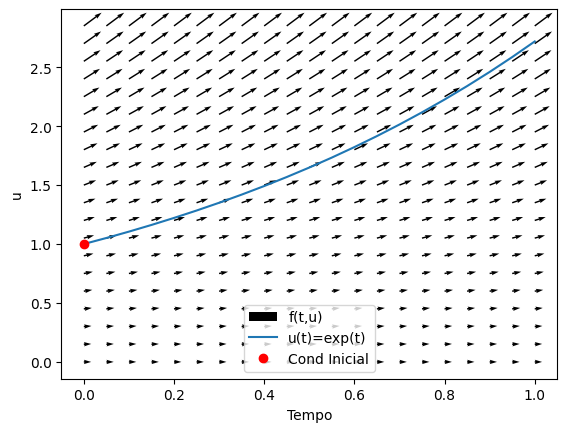

In [4]:
n = 20

#Grade de plotagem
t_tmp = np.linspace(t0, T, n+1)
u_tmp = np.arange(0, 3, 0.15)
t_grid, u_grid = np.meshgrid(t_tmp, u_tmp)

# du/dt=f(t,u)
# Gradient (dt/dt, du/dt) = (1, f(t,u))
DT = np.ones_like(t_grid) # 1
DU = u_grid  # lambda u

#Curva de solução
u0=1
u_t = np.exp(t_tmp)

#Vetores do campo
fig, ax = plt.subplots()
q = ax.quiver(t_grid, u_grid, DT, DU, angles='xy', label="f(t,u)")
ax.plot(t_tmp, u_t, label="u(t)=exp(t)")
ax.plot(0.0, u0, 'ro', label="Cond Inicial")
ax.set_xlabel("Tempo")
ax.set_ylabel("u")
plt.legend()
plt.show()

Na figura acima, temos o sistema de coordenadas dados por $(t,u)$, e estamos plotando a curva $(t,u(t))$. O gradiente desta curva é campo de vetores, dado por
$$
\frac{d}{dt}(t, u(t)) = (1, u'(t)) = (1, f(t,u)).
$$
Portanto, os vetores, $(1, f(t,u))$, para cada $(t,u)$, representados em preto na figura, estarão sempre tangentes a curva.

Em outro ponto de vista, queremos achar a curva $(t,u(t))$, começando no ponto $(t_0, u_0)$, que seja tangente a esse campo de vetores.




---



Implementação de um primeiro método numérico: Euler

In [5]:
# O método de Euler
def euler(u0, t0, T, f, n):
  h = (T-t0)/n
  u = np.empty(n+1)
  u[0]=u0
  for k in range(0,n):
    tk = t0+k*h
    u[k+1]=u[k]+h * f(tk, u[k])
  return u

In [6]:
n = 10

t = np.linspace(t0, T, n+1)
u_aprox = euler(u0, t0, T, f, n)
u_exata = u(t)

erro_final = np.abs(u_aprox[-1]-u_exata[-1])

tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final ])
print(tab)

+----+--------------+-------------------+-------------------+
| n  |   u Euler    |      u Exata      |      Erro Max     |
+----+--------------+-------------------+-------------------+
| 10 | 2.5937424601 | 2.718281828459045 | 0.124539368359045 |
+----+--------------+-------------------+-------------------+


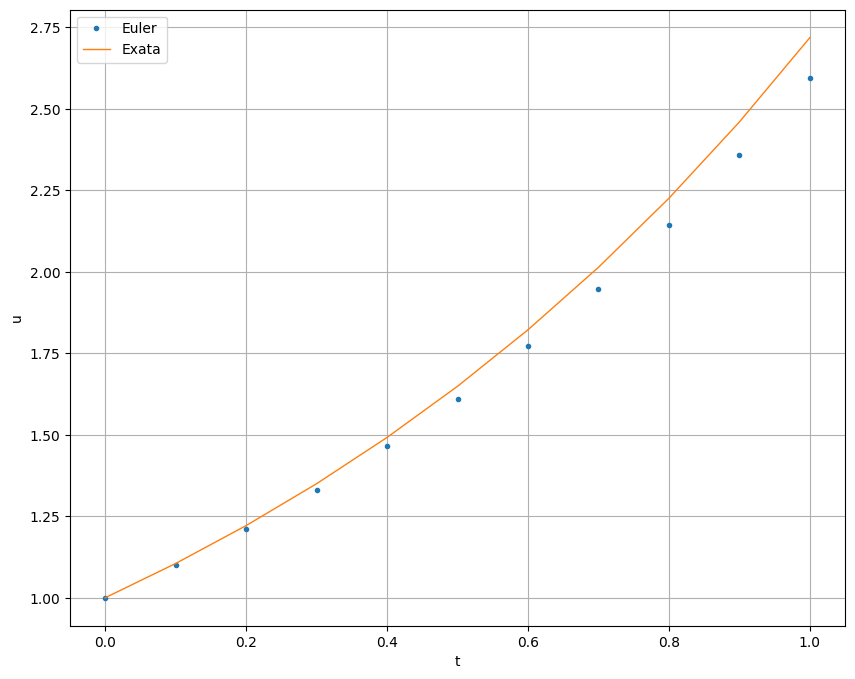

In [7]:
figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox, '.', label="Euler", linewidth=1)
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()



---



Questão importante:

>  O que acontece com o erro quando aumentamos o número de pontos no tempo? (diminuímos $h$).


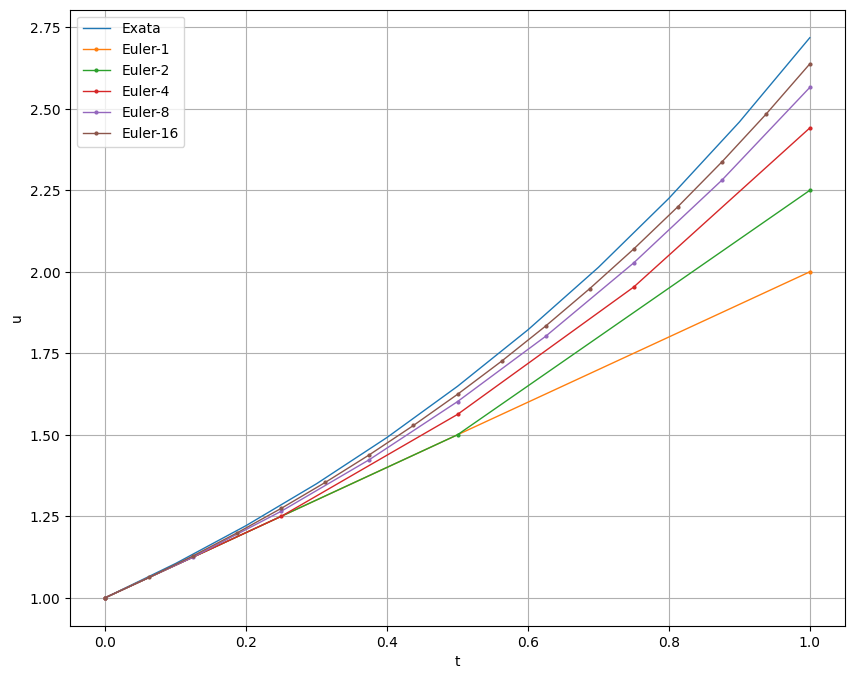

+----+--------------------+-------------------+---------------------+
| n  |      u Euler       |      u Exata      |       Erro Max      |
+----+--------------------+-------------------+---------------------+
| 1  |        2.0         | 2.718281828459045 |  0.7182818284590451 |
| 2  |        2.25        | 2.718281828459045 |  0.4682818284590451 |
| 4  |     2.44140625     | 2.718281828459045 |  0.2768755784590451 |
| 8  | 2.565784513950348  | 2.718281828459045 |  0.1524973145086972 |
| 16 | 2.6379284973665995 | 2.718281828459045 | 0.08035333109244558 |
+----+--------------------+-------------------+---------------------+


In [8]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
n_list = [1, 2, 4, 8,  16]

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")

for n in n_list:
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final = np.abs(u_aprox[-1]-u_exata[-1])
  tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final ])

  plt.plot(t, u_aprox, '-o', label="Euler-"+str(n), linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

print(tab)

In [9]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max', "Razão"])

erro_final = []
for n in range(10):
  n = 2**n
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final.append(np.abs(u_aprox[-1]-u_exata[-1]))
  if n > 1 :
    tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])


print(tab)

+-----+--------------------+-------------------+-----------------------+--------------------+
|  n  |      u Euler       |      u Exata      |        Erro Max       |       Razão        |
+-----+--------------------+-------------------+-----------------------+--------------------+
|  2  |        2.25        | 2.718281828459045 |   0.4682818284590451  | 1.5338665410585421 |
|  4  |     2.44140625     | 2.718281828459045 |   0.2768755784590451  | 1.6913078107692783 |
|  8  | 2.565784513950348  | 2.718281828459045 |   0.1524973145086972  | 1.8156095361486144 |
|  16 | 2.6379284973665995 | 2.718281828459045 |  0.08035333109244558  | 1.897834382662379  |
|  32 | 2.6769901293781833 | 2.718281828459045 |  0.04129169908086183  | 1.9459923636246856 |
|  64 |  2.6973449525651   | 2.718281828459045 |  0.020936875893945217 | 1.9721996390494474 |
| 128 | 2.7077390196880193 | 2.718281828459045 |  0.010542808771025758 | 1.985891648863529  |
| 256 | 2.712991624253433  | 2.718281828459045 | 0.005290204

Note que o erro cai pela metade (aproximadamente) quando dobramos o número de pontos (reduzimos o $h$ pela metade). Logo, dizemos que o método é de primeira ordem $O(h^1)$.

Isso será, ou foi, demonstrado em sala nas aulas teóricas.



---



###❗Exercício 1❗

Considere o problema de valor inicial

$$
\begin{cases}
u'(t)=-2\,tu^2/a, \quad  t \ge 0\\
u(0) = 1
\end{cases}
$$
onde $a$ é uma constante positiva.
Este problema tem solução analítica dada por
$$
  u(t) = \frac{1}{1 + t^2/a}.
$$

Vamos analisar o comportamento do erro para o Método de Euler com este exemplo. Posteriormente, iremos comparar os resultados com outro método.

Atividade:
1.   Defina $a =$ magic_int, ou seja, $a$ será o valor do seu último dígito não nulo do número usp multiplicado por 10.
2.   Resolva o problema no intervalo $[0,\sqrt{a}]$ usando o método de Euler com $2^k$ passos, $0 \le k \le 9$ (ou seja, $n=2^k$, $h=\sqrt{a}/2^k$, $0 \le k \le 9$.
3.   Apresente um gráfico com a solução exata e as aproximações para $n = 4, 8$ e $16$.
4.   Construa uma tabela apresentando, para os $10$ valores de $n$ usados, os valores da solução exata e das aproximações em $T=\sqrt{a}$, o valor absoluto dos erros em $T=\sqrt{a}$ e a razão entre estes erros para valores de $n$ consecutivos. O erro se comporta de acordo com o esperado?


### 🎯 Resolução E1 - Q1 🎯

In [10]:
'''
### Questão 1 - Declaração de a
'''

global a
a = magic_int

print(f"Valor de a vale.........: {a}")
print(f"Valor de sqrt(a) vale...: {np.sqrt(a):.5f}")

Valor de a vale.........: 80
Valor de sqrt(a) vale...: 8.94427


### 🎯 Resolução E1 - Q2 🎯

In [11]:
'''
### Questão 2 - Método de Euler
'''

def euler_method(u0, t0, u_dot, n_steps):
    """
    Função que implementa o método de Euler.

    Argumentos:
        u0       (float): Valor inicial da solução.
        t0       (float): Tempo inicial.
        u_dot (function): Função que calcula a derivada da solução.
        n_steps    (int): Número de passos a serem executados.

    Retorno:
        np.ndarray: Um vetor numpy de tamanho n_steps + 1 com a solução.
    """

    # Inicializações do passo, vetor u e u[0]
    h = np.divide(np.sqrt(a), n_steps)
    u = np.zeros(n_steps + 1)
    u[0] = u0

    # Loop para criar o próximo valor de u
    for k in range(n_steps):
        tk = t0 + k * h
        u[k + 1] = u[k] + h * u_dot(tk, u[k])

    return u

'''
### Definições do Problema
'''

def u_dot(t, u):
    """
    Função que implementa a derivada de u, é a função definida como f.

    Argumentos:
        t (float): Tempo atual.
        u (float): Valor de u em t.

    Retorno:
        float: Valor da derivada de u.
    """
    return np.divide(-2 * t * np.square(u), a)

# Valores Iniciais
t0 = 0.0
T  = np.sqrt(a)
u0 = 1.0

'''
### Resolução do Problema
'''

euler_results= {f"K={k}" : euler_method(u0, t0, u_dot, 2 ** k) for k in np.arange(10)}

### 🎯 Resolução E1 - Q3 🎯

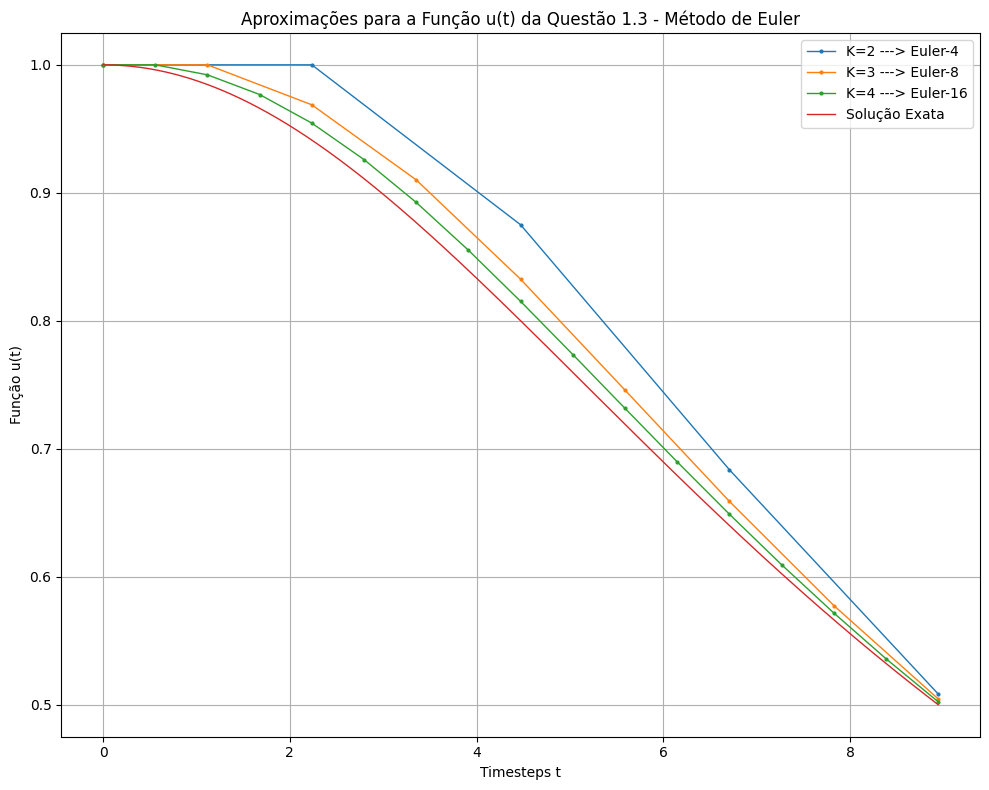

In [12]:
'''
### Questão 3 - Gráficos e Soluções
'''

def u_exact(t):
    """
    Função que devolve o valor teórico de u(t).

    Argumentos:
        t (np.ndarray): Vetor dos tempos que queremos calcular u(t).

    Retorno:
        np.ndarray: Valor de u em cada um dos pontos solicitados.
    """
    return np.divide(1, 1 + np.divide(np.square(t), a))

# Settando o ambiente do gráfico
fig, ax = plt.subplots(figsize=(10, 8))
plt.ylabel("Função u(t)")
plt.xlabel("Timesteps t")
plt.title("Aproximações para a Função u(t) da Questão 1.3 - Método de Euler")

def timesteps(t0, T, n):
    """
    Função auxiliar apenas para padronizar a geração dos timesteps.

    Argumentos:
        t0 (float): Tempo inicial.
        T  (float): Tempo final.
        n    (int): Número de passos.

    Retorno:
        np.ndarray: Vetor dos timesteps.
    """
    return np.linspace(t0, T, n + 1)

# Gráficos para n = 4, 8 e 16
plt.plot(timesteps(t0, T, 4),  euler_results["K=2"], '-o', linewidth=1, markersize=2, label="K=2 ---> Euler-4")
plt.plot(timesteps(t0, T, 8),  euler_results["K=3"], '-o', linewidth=1, markersize=2, label="K=3 ---> Euler-8")
plt.plot(timesteps(t0, T, 16), euler_results["K=4"], '-o', linewidth=1, markersize=2, label="K=4 ---> Euler-16")

# Observe que nos exemplos o Teórico é calculado com o Timesteps da última iteração, aqui 16
# Valor 16 é arbitrário, pode aumentar para o gráfico exato não ficar truncado
# smooth serve para controlar se quer que gráfico exato esteja suave ou não

smooth = True
exact_steps = 10000 if smooth else 16
plt.plot(timesteps(t0, T, exact_steps), u_exact(timesteps(t0, T, exact_steps)), label="Solução Exata", linewidth=1)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### 🎯 Resolução E1 - Q4 🎯

In [13]:
'''
### Questão 4 - Tabela
'''

def dict_to_prettytable(dictionary):
    """
    Função auxiliar que converte um dicionário para o PrettyTable
    Como não foi permitido utilizar o pandas nesse EP, foi preferível assim.

    Argumentos:
        dictionary (dict): Dicionário equivalente à tabela.

    Retorno:
        table (prettytable): Tabela com os valores do dicionário.
    """

    table = PrettyTable()
    for key in dictionary.keys():
        table.add_column(key, dictionary[key])
    return table

# Inicialização da "tabela" ---> Seria mais fácil com pandas
table_dict = {
    'k' : [],
    'n = 2^k' : [],
    'u Euler' : [],
    'u Exata' : [],
    'Erro Absoluto' : [],
    'Razão' : []
}


last_error = None

# Loop para montar a "tabela"
for key, value in euler_results.items():
    K = int(key.split("=")[1])

    # Cálculo do erro e da razão
    actual_error = np.abs(value[-1] - u_exact(T))

    # Escreve na tabela
    if K > 0:
        table_dict['k'].append(K)
        table_dict['n = 2^k'].append(2 ** K)
        table_dict['u Euler'].append(value[-1])
        table_dict['u Exata'].append(u_exact(T))
        table_dict['Erro Absoluto'].append(actual_error)
        table_dict['Razão'].append(last_error / actual_error)

    # Atualização do último erro
    last_error = actual_error

table = dict_to_prettytable(table_dict)

print(table)

+---+---------+--------------------+---------+------------------------+-----------------------+
| k | n = 2^k |      u Euler       | u Exata |     Erro Absoluto      |         Razão         |
+---+---------+--------------------+---------+------------------------+-----------------------+
| 1 |    2    | 0.4999999999999999 |   0.5   | 1.1102230246251565e-16 |   4503599627370496.0  |
| 2 |    4    | 0.5083560943603516 |   0.5   |  0.008356094360351562  | 1.328638687821671e-14 |
| 3 |    8    | 0.5045486124686074 |   0.5   | 0.0045486124686073826  |    1.83706447142328   |
| 4 |    16   | 0.5022642864188357 |   0.5   | 0.0022642864188356926  |   2.0088503074387125  |
| 5 |    32   | 0.5011213922644928 |   0.5   | 0.0011213922644928154  |   2.0191742805179653  |
| 6 |    64   | 0.5005571541057451 |   0.5   | 0.0005571541057450835  |   2.012714710220388   |
| 7 |   128   | 0.5002775936902161 |   0.5   | 0.0002775936902160714  |   2.0070849064019067  |
| 8 |   256   | 0.5001385392778465 |   0

### ✅ Respostas E1 ✅

Respostas das perguntas:

\\

1.  O valor de `a` foi definido como uma variável `global` para ser utilizado nas diversas etapas do EP, sem problemas. \
Observe que como `nusp = 11820298` $\implies a = magic\_int = 80$ e então $\sqrt{a} = \sqrt{80} ≈ 8.94427$

\\

2.  As soluções encontradas foram feitas para os valores $0 \le k \le 9$, dessa forma os resultados encontrados para os 10 valores de $k$ estão organizados na variável `euler_results`, observe que trata-se de um dicionário com chave na forma `"K=k"`.

    Por exemplo para obter o resultado das estimativas de $u(t)$ com $n=2^3=8$, precisamos chamar a variável na forma:

    ```python
    euler_results["K=3"]
    array([1.        , 1.        , 0.96875   , 0.91009521, 0.83244459,
           0.74582409, 0.65890947, 0.57750415, 0.50454861])
    ```

    Caso o professor corretor queira olhar individualmente cada resultado, recomendo criar uma nova célula abaixo e selecionar o valor de $k$ desejado.

\\

3. A imagem do gráfico que foi solicitada está no Item 🎯 Resolução E2 - Q3 🎯, como output da célula de código marcada com o comentário:

    ```python
    '''
    ### Questão 3 - Gráficos e Soluções
    '''
    ```

    Observe que para esse conjunto de códigos pode ser alterado o parâmetro booleano `smooth`. Esse parâmetro é para facilitar o processo de correção dos professores, pois nos exemplos gráficos anteriores o valor de `u_exata` é calculado com $n + 1$ espaçamentos (usando o último valor), porém para nosso exemplo no máximo temos $k = 4 \implies n = 16$, e é possível perceber a quebra dos valores por n ser pequeno, esteticamente é mais agradável um valor maior de $n$ para o gráfico exato aparentar contínuo. O valor `smooth` pode ser controlado da seguinte forma (e apenas afeta o gráfico da função exata):

    ```python
    smooth = True
    exact_steps = 10000 if smooth else 16
    # exact_steps vale 10000
    ```

    ```python
    smooth = False
    exact_steps = 10000 if smooth else 16
    # exact_steps vale 16
    ```

    Assim, facilita replicar os experimentos anteriores ou aumentar a suavidade da curva.

\\

4. A tabela construída para os valores $0 \le k \le 9$ está apresentada abaixo de forma truncada em 5 casas decimais para display no Markdown. Para visualização da tabela não-truncada, olhar o output da célula marcada com o comentário:

    ```python
    '''
    ### Questão 4 - Tabela
    '''
    ```

    Em resposta, o erro se comporta sim da maneira que era esperado, pois ao se aumentar uma unidade de $k$, estamos na verdade duplicando o valor de $n$, já que $n=2^k$ e consequentemente diminuímos pela metade o valor $h = \frac{T - t_0}{n}$ com isso é esperado que nosso erro caia pela metade a cada aumento de $k$.

    E isso é observado na prática tanto pela coluna `Erro Absoluto` que tem seu valor caindo pela metade a cada linha, quanto pela coluna `Razão` que a cada linha se aproxima mais do valor $2$.

<center>

| **k** | **n = 2^k** | **u Euler** | **u Exata** | **Erro Absoluto** |  **Razão** |
|:-----:|:-----------:|:-----------:|:-----------:|:-----------------:|:----------:|
|   1   |      2      |     0.5     |     0.5     |         0         | 4.5036e+15 |
|   2   |      4      |   0.50836   |     0.5     |      0.00836      |      0     |
|   3   |      8      |   0.50455   |     0.5     |      0.00455      |   1.83706  |
|   4   |      16     |   0.50226   |     0.5     |      0.00226      |   2.00885  |
|   5   |      32     |   0.50112   |     0.5     |      0.00112      |   2.01917  |
|   6   |      64     |   0.50056   |     0.5     |      0.00056      |   2.01271  |
|   7   |     128     |   0.50028   |     0.5     |      0.00028      |   2.00708  |
|   8   |     256     |   0.50014   |     0.5     |      0.00014      |   2.00372  |
|   9   |     512     |   0.50007   |     0.5     |      0.00007      |   2.0019   |

</center>

\\

- Observação: Os valores de erro não se comportam como o esperado apenas para as 2 primeiras linhas da tabela.

    O motivo para isso pode ser para $k=1$ não tem passos suficientes e a Razão estimada é em relação à $k=0$, algo que não faz muito sentido.

    Já para $k=2$ o valor de Razão é estranho, pois é estimado em relação ao $0$ da primeira linha.



---



### Método de 2a ordem

Como vimos anteriormente, o método de Euler é um método de 1a ordem $O(h)$, isto é, quando reduzimos $h$ pela metade, o erro cai aproximadamente pela metade.

Podemos obter um método de segunda ordem, isto é, com erro da ordem de $h^2$, indicado por $O(h^2)$, usando o método explicito do trapézio, também conhecido como Euler Aprimorado:

$$
u_{k+1}=u_k+\frac{h}{2}\left( f(t_k, u_k)+f(t_k+h, u_k+hf(t_k, u_k))\right),
$$
que pode ser implementado em 2 estágios:
$$
\kappa_1 = f(t_k, u_k) \\
\kappa_2 = f(t_k+h, u_k+h\kappa_1)\\
u_{k+1} = u_k+\frac{h}{2}\left(\kappa_1+\kappa_2 \right)
$$

###❗Exercício 2❗




1.  Implemente uma função de Python para o método de Euler Aprimorado, de forma similar ao feito para Euler, para um problema de Cauchy geral.

2.  Teste sua implementação para o mesmo problema do Exercíco 2:
$$
\begin{cases}
u'(t)=-2\,tu^2/a, \quad  t \ge 0\\
u(0) = 1
\end{cases},
$$
cuja solução exata é
$$
  u(t) = \frac{1}{1+t^2/a},
$$
onde $a =$ magic_int (valor do seu último dígito não nulo do número usp multiplicado por 10). Use $t_0=0$ e $T=\sqrt{a}$. Faça os testes com os mesmos valores de $n$ usados no Exercício 1: $n=2^k$, $0 \le k \le 9$.
3. Apresente um gráfico com a solução exata e as aproximações para $n = 4, 8$ e $16$.

4. Construa uma tabela apresentando, para os $10$ valores de $n$ usados, os valores da solução exata e das aproximações em $T=\sqrt{a}$, o valor absoluto dos erros em $T=\sqrt{a}$ e a razão entre estes erros para valores de $n$ consecutivos.

**Responda:**

1. O erro se comporta como esperado?
2. Um passo do Método de Euler Aprimorado usa duas avaliações de $f$, enquanto que um passo do Método de Euler usa apenas uma avaliação de $f$. Compare o número total de avaliações de $f$ em cada método para erros com a mesma ordem de grandeza (olhe a sua tabela). Compensa usar um método de ordem maior, porém mais caro em cada passo?


### 🎯 Resolução E2 - Q1 🎯

In [14]:
'''
### Questão 1 - Euler Aprimorado
'''

def enhanced_euler(u0, t0, u_dot, n_steps):
    """
    Função que implementa o método de Euler Aprimorado.

    Argumentos:
        u0       (float): Valor inicial da solução.
        t0       (float): Tempo inicial.
        u_dot (function): Função que calcula a derivada da solução.
        n_steps    (int): Número de passos a serem executados.

    Retorno:
        np.ndarray: Um vetor numpy de tamanho n_steps + 1 com a solução.
    """

    # Inicializações do passo, vetor u e u[0]
    h = np.divide(np.sqrt(a), n_steps)
    u = np.zeros(n_steps + 1)
    u[0] = u0

    # Loop para criar o próximo valor de u
    for k in range(n_steps):
        tk = t0 + k * h
        kappa1 = u_dot(tk    , u[k])
        kappa2 = u_dot(tk + h, u[k] + h * kappa1)
        u[k + 1] = u[k] + h * np.divide(kappa1 + kappa2, 2)

    return u

### 🎯 Resolução E2 - Q2 🎯

In [15]:
'''
### Questão 2 - Cálculo dos Resultados
'''

'''
### Definições do Problema
'''

# u_dot é o mesmo

# Valores Iniciais
t0 = 0.0
T  = np.sqrt(a)
u0 = 1.0

'''
### Resolução do Problema
'''

enhanced_euler_results = {f"K={k}" : enhanced_euler(u0, t0, u_dot, 2 ** k) for k in np.arange(10)}

### 🎯 Resolução E2 - Q3 🎯

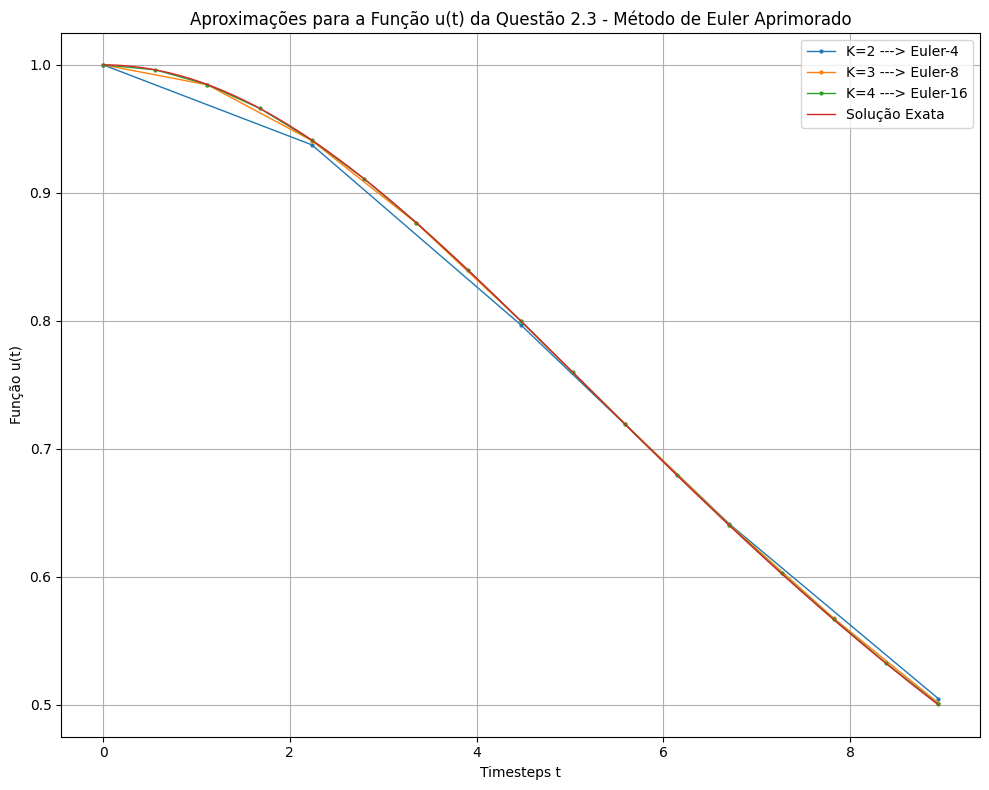

In [16]:
'''
### Questão 3 - Gráficos e Soluções
'''

# Settando o ambiente do gráfico
fig, ax = plt.subplots(figsize=(10, 8))
plt.ylabel("Função u(t)")
plt.xlabel("Timesteps t")
plt.title("Aproximações para a Função u(t) da Questão 2.3 - Método de Euler Aprimorado")

# Gráficos para n = 4, 8 e 16
plt.plot(timesteps(t0, T, 4),  enhanced_euler_results["K=2"], '-o', linewidth=1, markersize=2, label="K=2 ---> Euler-4")
plt.plot(timesteps(t0, T, 8),  enhanced_euler_results["K=3"], '-o', linewidth=1, markersize=2, label="K=3 ---> Euler-8")
plt.plot(timesteps(t0, T, 16), enhanced_euler_results["K=4"], '-o', linewidth=1, markersize=2, label="K=4 ---> Euler-16")

# Observe que nos exemplos o Teórico é calculado com o Timesteps da última iteração, aqui 16
# Valor 16 é arbitrário, pode aumentar para o gráfico exato não ficar truncado
# smooth serve para controlar se quer que gráfico exato esteja suave ou não

smooth = True
exact_steps = 10000 if smooth else 16
plt.plot(timesteps(t0, T, exact_steps), u_exact(timesteps(t0, T, exact_steps)), label="Solução Exata", linewidth=1)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### 🎯 Resolução E2 - Q4 🎯

In [17]:
'''
### Questão 4 - Tabela
'''

# Inicialização da "tabela" ---> Seria mais fácil com pandas
table_dict = {
    'k' : [],
    'n = 2^k' : [],
    'u Euler' : [],
    'u Exata' : [],
    'Erro Absoluto' : [],
    'Razão' : []
}

# Loop para montar a "tabela"
for key, value in enhanced_euler_results.items():
    K = int(key.split("=")[1])

    # Cálculo do erro e da razão
    actual_error = np.abs(value[-1] - u_exact(T))

    # Escreve na tabela
    if K > 0:
        table_dict['k'].append(K)
        table_dict['n = 2^k'].append(2 ** K)
        table_dict['u Euler'].append(value[-1])
        table_dict['u Exata'].append(u_exact(T))
        table_dict['Erro Absoluto'].append(actual_error)
        table_dict['Razão'].append(last_error / actual_error)

    # Atualização do último erro
    last_error = actual_error

table = dict_to_prettytable(table_dict)

print(table)

+---+---------+--------------------+---------+------------------------+---------------------+
| k | n = 2^k |      u Euler       | u Exata |     Erro Absoluto      |        Razão        |
+---+---------+--------------------+---------+------------------------+---------------------+
| 1 |    2    |   0.49951171875    |   0.5   |     0.00048828125      |  1024.0000000000005 |
| 2 |    4    | 0.5048106255815344 |   0.5   | 0.0048106255815344445  | 0.10150057237342779 |
| 3 |    8    | 0.5014093889442011 |   0.5   |  0.001409388944201062  |  3.413270411498393  |
| 4 |    16   | 0.5003669245251361 |   0.5   | 0.00036692452513609197 |  3.841086783932802  |
| 5 |    32   | 0.5000931249352308 |   0.5   |  9.31249352308372e-05  |  3.9401318693705716 |
| 6 |    64   | 0.5000234351266838 |   0.5   | 2.3435126683790664e-05 |  3.9737329559753896 |
| 7 |   128   | 0.5000058769192534 |   0.5   | 5.876919253355872e-06  |   3.98765504059097  |
| 8 |   256   | 0.5000014714332721 |   0.5   | 1.47143327211

### ✅ Respostas E2 ✅

Questões 1 - 4:

\\

1. A função do Método Euler Aprimorado foi implementada como `enhanced_euler` e tem assinatura idêntica a função anterior que implementava o Método de Euler Simples. A única diferença foi a adição dos estágios $\kappa_1$ e $\kappa_2$ que compõem o valor de $u_{k+1}$

\\

2. Analogamente à resposta da E1-Q2, as soluções encontradas foram feitas para os valores $0 \le k \le 9$, dessa forma os resultados encontrados para os 10 valores de $k$ estão organizados na variável `enhanced_euler_results`, observe que trata-se de um dicionário com chave na forma `"K=k"`.

    Por exemplo para obter o resultado das estimativas de $u(t)$ com $n=2^3=8$, precisamos chamar a variável na forma:

    ```python
    enhanced_euler_results["K=3"]
    array([1.        , 0.984375  , 0.94078774, 0.87637625, 0.79993611,
           0.71944825, 0.64078142, 0.56752128, 0.50140939])
    ```

    Caso o professor corretor queira olhar individualmente cada resultado, recomendo criar uma nova célula abaixo e selecionar o valor de $k$ desejado.

\\


3. A imagem do gráfico que foi solicitada está no Item 🎯 Resolução E2 - Q3 🎯, como output da célula de código marcada com o comentário:

    ```python
    '''
    ### Questão 3 - Gráficos e Soluções
    '''
    ```

    Assim, como anteriormente, é possível editar a variável booleana `smooth` por questões de correção da mesma forma.

\\

4. Da mesma forma que em E1-Q1, a tabela construída para os valores $0 \le k \le 9$ está apresentada abaixo de forma truncada em 7 casas decimais para display no Markdown. Para visualização da tabela não-truncada, olhar o output da célula marcada com o comentário:

    ```python
    '''
    ### Questão 4 - Tabela
    '''
    ```

<center>

| **k** | **n = 2^k** | **u Euler** | **u Exata** | **Erro Absoluto** | **Razão** |
|:-----:|:-----------:|:-----------:|:-----------:|:-----------------:|:---------:|
|   1   |      2      |   0.499512  |     0.5     |     0.0004883     |    1024   |
|   2   |      4      |   0.504811  |     0.5     |     0.0048106     |  0.10150 |
|   3   |      8      |   0.501409  |     0.5     |     0.0014094     |  3.41327  |
|   4   |      16     |   0.500367  |     0.5     |     0.0003669     |  3.84109  |
|   5   |      32     |   0.500093  |     0.5     |     0.0000931     |  3.94013  |
|   6   |      64     |   0.500023  |     0.5     |     0.0000234     |  3.97373  |
|   7   |     128     |   0.500006  |     0.5     |     0.0000059     |  3.98766  |
|   8   |     256     |   0.500001  |     0.5     |     0.0000015     |  3.99401  |
|   9   |     512     |     0.5     |     0.5     |     0.0000004     |  3.99705  |

</center>

\\

Respostas 1 - 2:

\\

1. Ao contrário do que foi visto no primeiro exercício, em que a Razão do Erro do Método de Euler se aproximava de $2$, a Razão do Erro do Método de Euler Aprimorado se aproxima de $4$, como é comprovado pela coluna da tabela gerada. Isso está de acordo com o resultado esperado teórico, segundo a dedução abaixo:

<center>
$h = \frac{T - t_0}{n} = \frac{T - t_0}{2^k}$

$Erro_{k} \approx h^2 = \left[\frac{T - t_0}{2^k} \right]^2 = \frac{(T - t_0)^2}{2^{2 \cdot k}}$

$Razão = \frac{Erro_k}{Erro_{k+1}} \approx \frac{2^{2 \cdot (k+1)}}{(T - t_0)^2} \cdot \frac{(T - t_0)^2}{2^{2 \cdot k}} = \frac{2^{2 \cdot (k+1)}}{2^{2 \cdot k}} = 2^{(2 \cdot k + 2) - (2 \cdot k)} = 2^{2} = 4$

</center>

\\

2. A idéia trazida nesta pergunta parece uma estimativa de complexidade da função, geralmente esse problema seria tratado como a notação Big-$\mathcal{O}$, mas como a idéia é mais qualitativa achei melhor ilustar com um gráfico (output da célula de código abaixo) a relação de grandeza entre número de chamados de $f$ com o Erro. Pelo gráfico é possível notar que o Método de Euler Aprimorado é substancialmente superior, e essa superioridade é realçada quanto maior o valor de $n$.

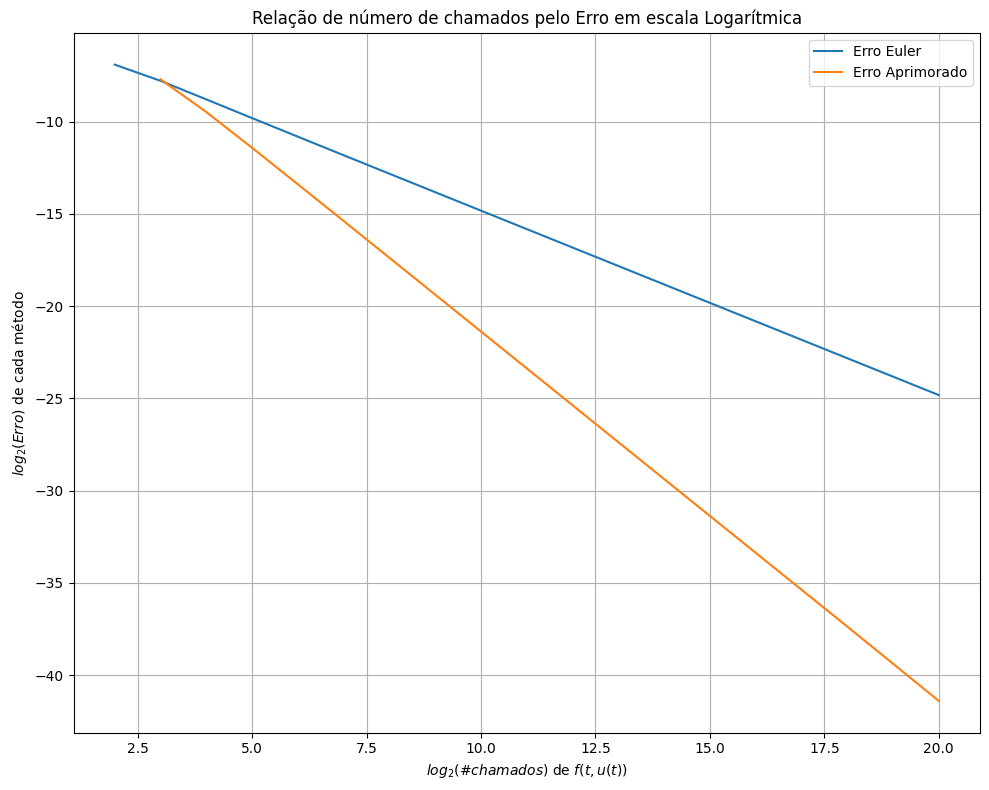

In [18]:
'''
### Gráfico de Complexidade
'''

# Inicialização
eul_res = {}
enh_res = {}
error_eul = []
error_enh = []

# Loop de K's
for k in np.arange(2, 21):

    # Cálculo usando Euler e Euler Aprimorado
    eul_res[f"K={k}"] = euler_method(u0, t0, u_dot, 2 ** k)
    enh_res[f"K={k}"] = enhanced_euler(u0, t0, u_dot, 2 ** k)

    # Extração de estimativas de u(t)
    u_eul = eul_res[f"K={k}"]
    u_enh = enh_res[f"K={k}"]
    u_true = u_exact(timesteps(t0, T, np.square(k)))

    # Cálculo do Erro
    error_eul.append(np.abs(u_true[-1] - u_eul[-1]))
    error_enh.append(np.abs(u_true[-1] - u_enh[-1]))

# Log2 do Erro ---> Estamos interessados na ordem de magnitude
log_error_eul = np.log2(np.array(error_eul))
log_error_apr = np.log2(np.array(error_enh))

# Análogo ao Log2 dos n
calls = np.arange(2, 21)

# Inicialização do Gráfico
figure, axs = plt.subplots(figsize=(10, 8))
plt.title("Relação de número de chamados pelo Erro em escala Logarítmica")
plt.xlabel("$log_{2}(\# chamados)$ de $f(t, u(t))$")
plt.ylabel("$log_{2}(Erro)$ de cada método")

# Visualização
plt.plot(calls[ :], log_error_eul[: ], label="Erro Euler")
plt.plot(calls[1:], log_error_apr[:-1], label="Erro Aprimorado")

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



---



## Pêndulo simples

A maior parte das aplicações interessantes baseadas em equações diferenciais são modeladas com equações de ordens mais altas (derivadas segundas, terceiras, ...) ou vem de sistemas de equações de equações diferenciais. Vejamos um exemplo, o do pêndulo simples.

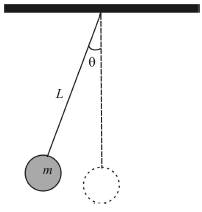

Um pêndulo simples consiste em um fio de comprimento $L$ e massa desprezível com uma extremidade fixada e outra amarrada em uma massa pontual $m$. O ângulo $\theta(t)$ que a massa faz com o eixo vertical sob ação da aceleração da gravidade $g$, sem atrito, satisfaz a seguinte equação diferencial ordinária

$$
\theta''(t) = -\frac{g}{L}\sin(\theta(t)).
$$

Gostaríamos de resolver este problema numericamente. Para isso, consideramos uma variável $\omega = \theta\,'$, a velocidade angular, e obtemos o seguinte sistema de equações de primeira ordem

\begin{align}
\theta'(t) &= \omega(t)\\
\omega'(t) &= -\frac{g}{L}\sin(\theta(t)).
\end{align}



Para usar os métodos numéricos precisamos agora definir o problema de forma vetorial,

$$
u'=f(t,u),
$$
onde
$$
u = [\theta, \omega],
$$
e
$$
f(t,u) = [ f_1(t,u), f_2(t,u) ] =  [\omega, -\frac{g}{L}\sin(\theta)].
$$

In [19]:
#Definição do problema
t0 = 0. #Tempo inicial
T = 8.  #Tempo final
u0 = np.array([np.pi/6 , 0.]) # posição angular inicial (theta0) e velocidade angular inicial (omega0)
g = 24.79 #Aceleração da gravidade (Jupiter = 24.79 , Terra = 9.81)
L = 1.2 #comprimento do fio (metros)
n = 1000 #Número de passos que daremos no tempo

def f(t, u): #note que essa função agora recebe um vetor [theta, w] e devolve um vetor [f1(theta, w), f2(theta, w)]
  return np.array([u[1], -(g/L)*np.sin(u[0])])

Podemos (devemos!) ajustar o nosso código para ele ser vetorial. Mas nota que ele só precisa saber quem é $u$ e $f$, e vale para outros sistemas de equações diferenciais ordiárias se mudarmos $u$ e $f$.

Abaixo mostramos um exemplo de um método conhecido como Runge-Kutta 44,


\begin{align}
κ_1 &= f(t_k,u_k), \\
κ_2 &= f\left(t_k + \frac{h}{2} ,u_k + \frac{h}{2}\kappa_1 \right), \\
κ_3 &= f\left(t_k + \frac{h}{2} ,u_k + \frac{h}{2}\kappa_2 \right), \\
κ_4 &= f\left(t_k + h ,u_k + h\kappa_3 \right), \\
\end{align}

$$
u_{k+1}=u_{k}+\frac{h}{6}(\kappa_1 + 2\kappa_2 + 2\kappa_3+ \kappa_4).
$$

In [20]:
## O método de Runge-Kutta 4 4 vetorial
def rk44_vet(u0, t0, T, f, n):
  h = (T-t0)/n
  dim = u0.size
  u = np.empty((n+1,dim))
  u[0, :] = u0
  for k in range(0,n):
    tk = t0+k*h
    kappa1 = f(tk, u[k, :])
    kappa2 = f(tk+h/2, u[k, :]+h*kappa1/2)
    kappa3 = f(tk+h/2, u[k, :]+h*kappa2/2)
    kappa4 = f(tk+h, u[k, :]+h*kappa3)
    u[k+1, :]=u[k, :]+h * (kappa1+2*kappa2+2*kappa3+kappa4)/6.0
    #print(k, u[k,:])
    if np.max(np.max(u[k, :])) > 10e5:
      print("Método instável...desisto!")
      return u
  return u

Vejamos a solução do prolema ao longo do tempo (nas duas variáveis, $\theta$ e $\omega=\theta'$). Note que o ângulo está em radianos.

Text(0.5, 1.0, 'Solução do problema')

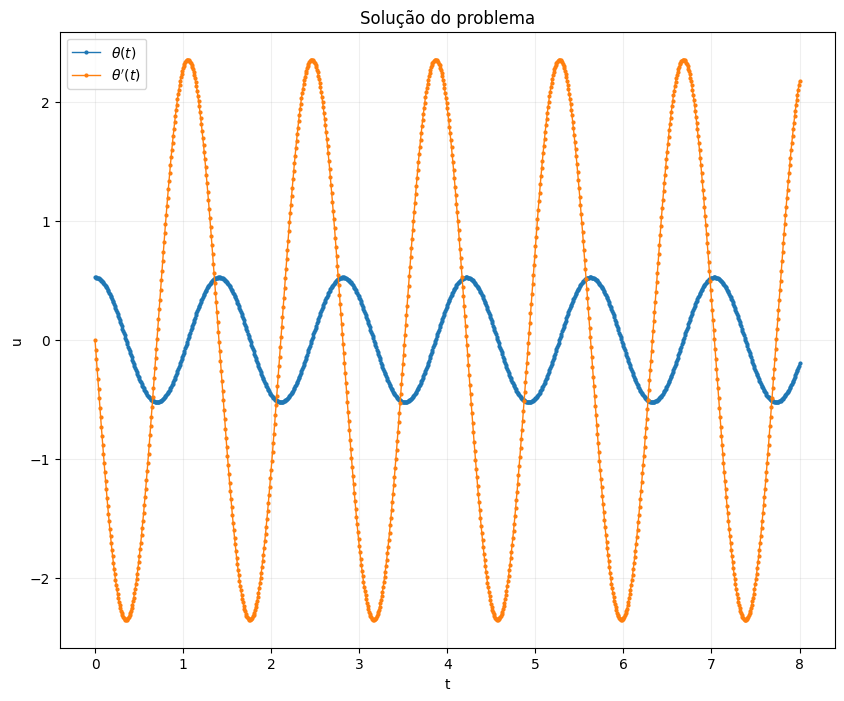

In [21]:
u_sol = rk44_vet(u0, t0, T, f, n);

t = np.linspace(t0, T, n+1)
figure, axs = plt.subplots(figsize=(10,8))
plt.xlabel("t")
plt.ylabel("u")
plt.plot(t, u_sol[:,0], '-o', label=r"$\theta(t)$", linewidth=1, markersize=2)
plt.plot(t, u_sol[:,1], '-o', label=r"$\theta'(t)$", linewidth=1, markersize=2)
plt.legend()
plt.grid(alpha=0.2)
plt.title("Solução do problema")

Podemos fazer o gráfico das soluções no plano $\theta \times \omega$, esboçando assim uma trajetória no retrato de fases do sistema de EDOs. Notamos que parece que a trajetória tem uma periodicidade, com o sistema retornando ao estado inicial passado um certo tempo.

Text(0.5, 1.0, "Curva $\\theta(t) \\times \\theta'(t)$")

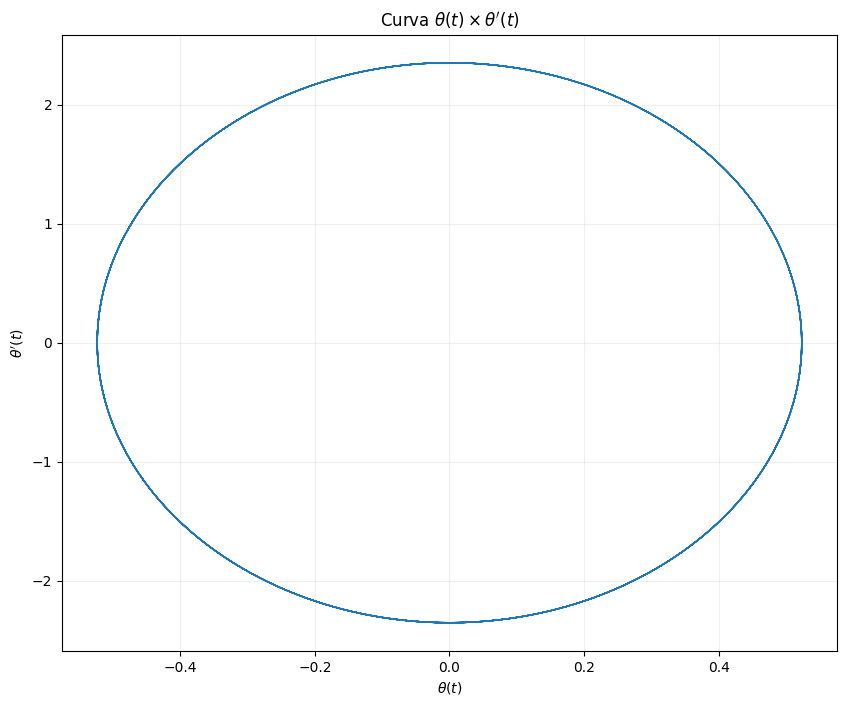

In [22]:
figure, axs = plt.subplots(figsize=(10,8))
plt.xlabel(r"$\theta(t)$")
plt.ylabel(r"$\theta'(t)$")
plt.plot(u_sol[:,0], u_sol[:,1], '-o', linewidth=1, markersize=0)
plt.grid(alpha=0.2)
plt.title(r"Curva $\theta(t) \times \theta'(t)$")



---



##O método de Runge-Kutta-Fehlberg

Os métodos númericos para resolução de equações diferenciais ordinárias fazem uso de um espaçamento $h$ no tempo a cada passo. A precisão atingida pelo método depende deste valor de $h$. Neste sentido, descrevemos uma técnica para melhorar a precisão de forma eficiente.

Considere dois métodos numéricos, um de ordem $p$, e outro de ordem $p+1$, que a partir do valor $x_i$ geram a aproximação para $x(t_{i+1})$ respectivamente como:

\begin{align}
x_{i+1} &= x_i +  h\,\Phi(t_i,x_i,h) \quad \text{e }\\
\tilde{x}_{i+1} &= x_i +  h\,\tilde{\Phi}(t_i,x_i,h).
\end{align}

Assumindo que a aproximação $x_i$ no instante $t_i$ seja praticamente igual à solução $x(t_i)$, o erro de truncamento para o método de ordem $p$ pode ser escrito como

$$
\tau_{i+1}(h) = \frac{\tilde{x}_{i+1} - x_{i+1}}{h}.
$$

Por meio desta expressão, pode-se estimar o erro de truncamento e verificar se este se encontra dentro da ordem de precisão desejada e se é necessário aumentar ou reduzir o espaçamento $h$. Usando que

$$
\tau_{i+1}(h) \approx Ch^p
$$

onde $C \in \mathbb{R}$ e se utilizarmos um novo espaçamento $\tilde{h} = \alpha h$, teríamos

$$
\tau_{i+1}(h) ≈ C(\alpha h)^p ≈ \alpha^p \tau_{i+1}(h)  \approx \alpha^p \frac{\tilde{x}_{i+1} - x_{i+1}}{h}.
$$

Como desejamos que a norma do erro de truncamento seja menor que uma tolerância $ɛ$, devemos ter

$$
\alpha \leq \left( \frac{ɛh}{c ||\tilde{x}_{i+1} - x_{i+1}||}\right)^{1/p},
$$
onde $c>1$ é um fator de segurança.

Assim, descrevemos o método de Runge-Kutta-Fehlberg. A ideia é considerar métodos de quarta e quinta ordem que compartilhem o cálculo dos mesmos estágios. Em função das aproximações encontradas, estima-se o erro local de truncamento $\tau_{i+1}$ como explicado anteriormente. Caso este valor seja menor de $ɛ$, o valor de $x_{i+1}$ obtido pelo método de quarta ordem é aceito como aproximação no instante $t_{i+1}$ e multiplicamos o passo por $\alpha$, empregando um fator de segurança, por exemplo, $c=2$.

No caso de $\tau_{i+1}$ ser maior que $ɛ$, o valor de $x_{i+1}$ é rejeitado. Multiplica-se $h$ por $\alpha$ e refazemos os cálculos de $x_{i+1}$ e $\tilde{x}_{i+1}$. Uma vez que $x_{i+1}$ tenha sido aceito, procede-se ao cálculo da solução no próximo passo usando o mesmo procedimento. O método termina quando atinge-se o instante final desejado. Para garantir que o instante final $T$ não seja ultrapassado, pode-se limitar o valor de $h$ a cada passo fazendo que este seja no máximo igual a $T - t_i$. Também é aconselhável que o passo seja majorado inferiormente e superiormente para evitar valores pequenos ou grandes demais.

Os métodos ultizados requerem $6$ estágios dados por

\begin{align}
κ_1 &= hf(t_i,x_i) \\
κ_2 &= hf\left(t_i + \frac{1}{4}h ,x_i + \frac{1}{4}\kappa_1 \right) \\
κ_3 &= hf\left(t_i + \frac{3}{8}h ,x_i + \frac{3}{32}\kappa_1 + \frac{9}{32}\kappa_2 \right) \\[0.2cm]
κ_4 &= hf\left(t_i + \frac{12}{13}h ,x_i + \frac{1932}{2197}\kappa_1 - \frac{7200}{2197}\kappa_2 + \frac{7296}{2197}\kappa_3\right) \\[0.2cm]
κ_5 &= hf\left(t_i + h ,x_i + \frac{439}{216}\kappa_1 - 8\kappa_2 + \frac{3680}{513}\kappa_3 - \frac{845}{4104}\kappa_4\right) \\[0.2cm]
κ_6 &= hf\left(t_i + \frac{1}{2}h ,x_i - \frac{8}{27}\kappa_1 + 2\kappa_2 - \frac{3544}{2565}\kappa_3 + \frac{1859}{4104}\kappa_4 - \frac{11}{40}\kappa_5\right).
\end{align}

O método de quarta ordem é dado por

$$
x_{i+1} = x_i + \frac{25}{216}\kappa_1 + \frac{1408}{2565}\kappa_3 + \frac{2197}{4104}\kappa_4 - \frac{1}{5}\kappa_5,
$$

enquanto que o de ordem $5$ é obtido por

$$
\tilde{x}_{i+1} = x_i + \frac{16}{135}\kappa_1 + \frac{6656}{12825}\kappa_3 + \frac{28561}{56430}\kappa_4 - \frac{9}{50}\kappa_5 + \frac{2}{55}\kappa_6.
$$

Note que os dois métodos usam os mesmos estágios ($\kappa s)$, logo o custo computacional desse método não é o mesmo de calcular dois métodos separadamente, pois as contas são aproveitadas nos dois métodos!

------------------

### ❗ Exercício 3  ❗

1. Implemente o método de quarta ordem do RKF com o pêndulo simples usando condições iniciais $\theta_0=\pi/6$ e $\omega_0=0$. Use os mesmos parâmetros do problema anterior do pêndulo simples com $n=100$ passos de tempo e calcule o erro cometido com base em uma simulação com método RK44 usado anteriormente, usando n=1000 passos de tempo. Calcule o erro no instante final.
2. Implemente o método de 5 ordem do RKF e repita o procedimento do item 1, calculando o erro obtido no instante de tempo final. Compare os erros obtidos do método de 4a e 5a ordens.
3. Implemente o método RKF completo, isto é, que calcula simulaneamente o método de 4a e 5a ordem, e controla o passo de tempo com base no valor de $\alpha$. Neste caso, considere:
  - $ϵ = 10^{-4}$
  - $ϵ = 10^{-6}$

Compute o erro final comparando com o método RK44 com 1000 passos de tempo. Ao final, veja quantos passos de tempo o método RKF teve que executar para chegar nesse erro.
4. Experimente colocar o pêndulo no planeta de Júpiter (o valor da aceleração da gravidade vai mudar!). Neste caso, o pêndulo vai oscilar mais rápido ou devagar? Simule o caso usando o método RKF e o RK44. Avalie quantos passos de tempo o RKF dá em Jupiter e compare com a quantidade de passos que o método precisou na simulação na Terra. Qual o motivo da diferença?


### 🎯 Resolução E3 - Q1 🎯

In [23]:
'''
### Questão 1 - Método de RKF-4
'''

def rkf_4_method(u0, t0, T, u_dot, n_steps):
    """
    Função que implementa o método RKF-4.

    Argumentos:
        u0       (float): Valor inicial da solução.
        t0       (float): Tempo inicial.
        T        (float): Tempo final.
        u_dot (function): Função que calcula a derivada da solução.
        n_steps    (int): Número de passos a serem executados.

    Retorno:
        np.ndarray: Um vetor numpy de tamanho n_steps + 1 com a solução.
    """

    # Inicializações do passo, vetor u e u[0]
    h = np.divide(T - t0, n_steps)
    u = np.empty((n_steps + 1, u0.shape[0]))
    u[0, :] = u0

    # Loop para criar o próximo valor de u
    for k in range(0, n_steps):

        # Atualização tk
        tk = t0 + k * h

        # Cálculo dos kappas 1-5
        kappa1 = h * u_dot(
            tk,
            u[k, :]
        )

        kappa2 = h * u_dot(
            tk + 1/4 * h,
            u[k, :] + 1/4 * kappa1
        )

        kappa3 = h * u_dot(
            tk + 3/8 * h,
            u[k, :] + 3/32 * kappa1 + 9/32 * kappa2
        )

        kappa4 = h * u_dot(
            tk + 12/13 * h,
            u[k, :] + 1932/2197 * kappa1 - 7200/2197 * kappa2 + 7296/2197 * kappa3
        )

        kappa5 = h * u_dot(
            tk + h,
            u[k, :] + 439/216 * kappa1 - 8 * kappa2 + 3680/513 * kappa3 - 845/4104 * kappa4
        )

        # Solução em k+1
        u[k + 1] = u[k, :] + 25/216 * kappa1 + 1408/2565 * kappa3 + 2197/4104 * kappa4 - 1/5 * kappa5

    return u

'''
### Definições do Problema
'''

def u_dot(t, u):
    """
    Função que implementa a derivada de u, é a função definida como f.
    Neste exercício é relativo ao pêndulo simples:
    [theta, omega] ---> [f1(theta, omega), f2(theta, omega)]

    Argumentos:
        t    (float): Tempo atual.
        u[0] (float): Valor de u em t, para o ângulo theta.
        u[1] (float): Valor de u em t, para velocidade angular omega.

    Retorno:
        nd.ndarray: Vetor contendo [theta', omega']
    """
    return np.array(
        [
            u[1],
            - (g / L) * np.sin(u[0])
        ]
    )

t0 = 0.
T  = 8.
# g = 9.81  # Terra
g = 24.79 # Júpiter
L = 1.2
n_steps = 100
u0 = np.array([np.pi/6, 0.])

'''
### Resolução do Problema
'''

u_rkf_4 = rkf_4_method(u0, t0, T, u_dot, n_steps)

print(f"Erro Theta: {np.abs(u_rkf_4[-1, 0] - u_sol[-1, 0])}")
print(f"Erro Omega: {np.abs(u_rkf_4[-1, 1] - u_sol[-1, 1])}")

Erro Theta: 1.1839921340212056e-05
Erro Omega: 0.0013284749059003786


### 🎯 Resolução E3 - Q2 🎯

In [24]:
'''
### Questão 2 - Método de RKF-5
'''

def rkf_5_method(u0, t0, T, u_dot, n_steps):
    """
    Função que implementa o método RKF-5.

    Argumentos:
        u0       (float): Valor inicial da solução.
        t0       (float): Tempo inicial.
        T        (float): Tempo final.
        u_dot (function): Função que calcula a derivada da solução.
        n_steps    (int): Número de passos a serem executados.

    Retorno:
        np.ndarray: Um vetor numpy de tamanho n_steps + 1 com a solução.
    """

    # Inicializações do passo, vetor u e u[0]
    h = np.divide(T - t0, n_steps)
    u = np.empty((n_steps + 1, u0.shape[0]))
    u[0, :] = u0

    # Loop para criar o próximo valor de u
    for k in range(0, n_steps):

        # Atualização tk
        tk = t0 + k * h

        # Cálculo dos kappas 1-6
        kappa1 = h * u_dot(
            tk,
            u[k, :]
        )

        kappa2 = h * u_dot(
            tk + 1/4 * h,
            u[k, :] + 1/4 * kappa1
        )

        kappa3 = h * u_dot(
            tk + 3/8 * h,
            u[k, :] + 3/32 * kappa1 + 9/32 * kappa2
        )

        kappa4 = h * u_dot(
            tk + 12/13 * h,
            u[k, :] + 1932/2197 * kappa1 - 7200/2197 * kappa2 + 7296/2197 * kappa3
        )

        kappa5 = h * u_dot(
            tk + h,
            u[k, :] + 439/216 * kappa1 - 8 * kappa2 + 3680/513 * kappa3 - 845/4104 * kappa4
        )

        kappa6 = h * u_dot(
            tk + 1/2 * h,
            u[k, :] - 8/27 * kappa1 + 2 * kappa2 - 3544/2565 * kappa3 + 1859/4104 * kappa4 - 11/40 * kappa5
        )

        # Solução em k+1
        u[k + 1] = u[k, :] + 16/135 * kappa1 + 6656/12825 * kappa3 + 28561/56430 * kappa4 - 9/50 * kappa5 + 2/55 * kappa6

    return u

'''
### Resolução do Problema
'''

u_rkf_5 = rkf_5_method(u0, t0, T, u_dot, n_steps)

print(f"Erro Theta: {np.abs(u_rkf_5[-1, 0] - u_sol[-1, 0])}")
print(f"Erro Omega: {np.abs(u_rkf_5[-1, 1] - u_sol[-1, 1])}")

Erro Theta: 0.00010724527774624848
Erro Omega: 0.0002504303501615901


### 🎯 Resolução E3 - Q3 🎯

In [25]:
'''
### Questão 3 - Método de RKF-45
### Infelizmente não deu tempo de fazer :(
'''
pass

### 🎯 Resolução E3 - Q4 🎯

In [26]:
'''
### Questão 4 - Teste Terra vs. Júpiter
### Infelizmente não deu tempo de fazer :(
'''
pass

### ✅ Respostas E3 ✅

Questões 1 - 4:

\\

1. Comparando os valores calculados entre os métodos RKF-4 e o método RK-44 dado, chegamos a um erro de:

    $E_{\theta} \approx 1.18399 \times 10^{-5}$

    $E_{\omega} \approx 1.32847 \times 10^{-3}$

\\

2. Comparando os valores calculados entre os métodos RKF-5 e o método RK-44 dado, chegamos a um erro de:

    $E_{\theta} \approx 1.07245 \times 10^{-4}$

    $E_{\omega} \approx 2.50430 \times 10^{-4}$

\\

3. Não deu tempo de fazer 😔

Resposta 4:

\\

4. Não deu tempo de fazer a simulação 😔. Porém, podemos usar a fórmula teórica do período de um pêndulo simples $T = 2 \pi \sqrt{\frac{L}{g}}$. Dessa forma concluímos que uma maior gravidade implicará em um menor período de oscilação, e como $f = \frac{1}{T}$, essa maior gravidade impacta em uma maior frequência.

    $\therefore$ Júpiter, por ter uma maior gravidade, tem seu pêndulo oscilando mais rapidamente que o pêndulo da Terra (que tem menor gravidade).

--------------

## Aplicações: O Circuito de Chua


O circuito de Chua é um circuito elétrico simples formado por 2 capacitores lineares ($C_1$ e $C_2$), um resistor linear ($R$), um indutor linear ($L$) e um resistor não linear controlado pela tensão ($N_R$), conforme a figura abaixo.

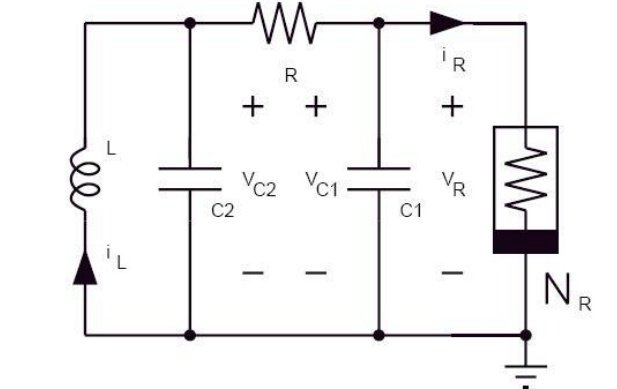


O resistor não linear $N_R$, conhecido como diodo de Chua, é definido de forma linear por pedaços, isto é, dependendo da tensão ele fornece uma resistência diferente. A corrente de $N_R$ é definida por
\begin{equation*}
g(V)=
\begin{cases}
G_b V + (G_b-G_a) E, &\quad \text{se} \quad V \leq -E \\
G_a V, &\quad \text{se} \quad -E < V < E \\
G_b V + (G_a-G_b) E, &\quad \text{se} \quad V \geq E\\
\end{cases}
\end{equation*}

onde $G_a$ e $G_b$ são inclinações das curvas da relação tensão ($V$) versus corrente ($i$) e $E>0$ é um valor de tensão de corte para mudança de regime, conforme o gráfico abaixo.

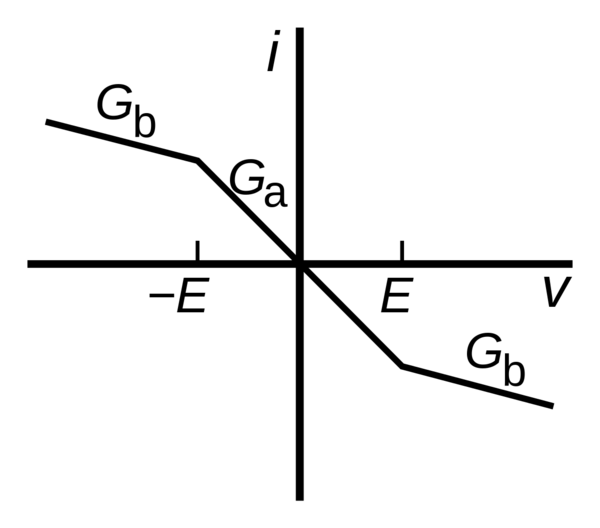


Usando as leis de  Kirchhoff para esse circuito é possível deduzirmos o seguinte sistema de equações diferenciais para as tensões nos capacitores ($V_{C_1}$ e $V_{C_2}$) e a corrente no indutor ($I_L$),
\begin{eqnarray*}
\dot{V}_{C_1}&=&\frac{1}{R C_1}(V_{C_2}-V_{C_1})-\frac{1}{C_1} g(V_{C_1}), \\
\dot{V}_{C_2}&=&\frac{1}{R C_2}(V_{C_1}-V_{C_2})+\frac{1}{C_2}I_L,\\
\dot{I}_L&=&-\frac{1}{L}V_{C_2}.
\end{eqnarray*}


O interessante desse circuito é que ele é simples de ser montado (veja aqui: https://inst.eecs.berkeley.edu/~ee129/sp10/handouts/ChuasCircuitForHighSchoolStudents-PREPRINT.pdf ) e define um sistema dinâmico caótico, para o qual pequenas variações nos parâmetros e condições iniciais podem levar a soluções bastante distintas!

Vamos ver um exemplo de solução desse problema baseado em http://www.chuacircuits.com/ !

#### Exemplo de Circuito de Chua


Vamos considerar os seguintes parâmetros fixados:

*   Alimentação por bateria de $9V$
*   $C_1  =  10 nF $
*   $C_2 = 100 nF $
*   $L = 18 mH $

Para o resistor não linear considerar:
*  $E=1.17391304 V,$
*  $G_a=-50/66 mS,$
*  $G_b=-9/22 mS. $

Para simular um comportamento passível de ser implementado fisicamente, o resistor não linear precisa de parâmetros adicionais para manter o sistema dentro de tensões realizáveis. Considere que a equação definida anteriormente para o resistor não linear é válida para tensões em módulo menores que $E_{\max}$. Para tensões maiores do que isso, considerar
\begin{equation*}
g(V)=
\begin{cases}
G_c V + E_{\max} (G_c-G_b) +  E (G_b-G_a) & \quad \text{se} \quad V \leq -E_{\max} \\
G_b V + (G_b-G_a) E, &\quad \text{se} \quad -E_{\max} < V \leq -E \\
G_a V, &\quad \text{se} \quad -E < V < E \\
G_b V + (G_a-G_b) E, &\quad \text{se} \quad E \leq V < E_{\max}\\
G_c V + E_{\max} (G_b-G_c) +  E (G_a-G_b) & \quad \text{se} \quad  E_{\max} \leq V \\
\end{cases}
\end{equation*}
Adotaremos $E_{\max}=8.1818$ V e $G_c=4.591$ mS.



In [27]:
#Definindo os parâmetros
C1 = 10*10**(-9)
print("C1 =", C1 , "F")

C2 = 100*10**(-9)
print("C2 =", C2 , "F")

L = 18*10**(-3)
print("L =", L , "H")

E = 1.17391304
print("E =", E , "V")

Emax = 8.1818
print("Emax =", Emax , "V")

Ga =-(50/66)*10**(-3)
print("Ga =", Ga , "S")

Gb =-(9/22)*10**(-3)
print("Gb =", Gb , "S")

Gc = 4.591*10**(-3)
print("Gc =", Gc , "S")

R = 1800
print("R =", R , "Ohms")

C1 = 1e-08 F
C2 = 1.0000000000000001e-07 F
L = 0.018000000000000002 H
E = 1.17391304 V
Emax = 8.1818 V
Ga = -0.0007575757575757576 S
Gb = -0.00040909090909090913 S
Gc = 0.0045910000000000005 S
R = 1800 Ohms


In [28]:
# Função g
#  (não é vetorial por conta dos ifs!)
def g(V):
  if V <= -Emax:
    return Gc*V+Emax*(Gc-Gb)+E*(Gb-Ga)
  if V <= -E:
    return Gb*V+E*(Gb-Ga)
  if V <= E:
    return Ga*V
  if V <= Emax:
    return Gb*V+E*(Ga-Gb)
  if V >= Emax:
    return Gc*V+Emax*(Gb-Gc)+E*(Ga-Gb)


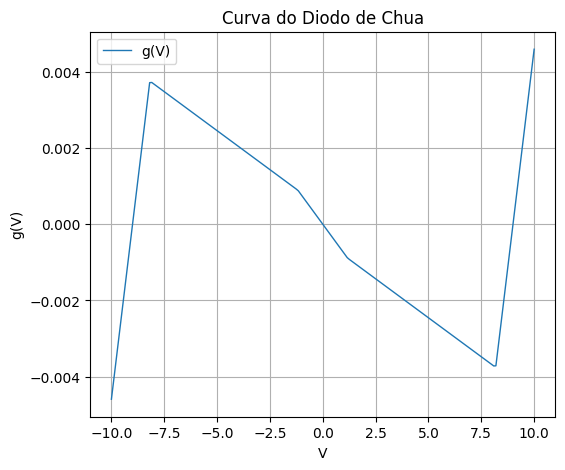

In [29]:
#Voltagens de teste para gráfico da função g
v = np.linspace(-10, 10, 200)
gv = np.zeros_like(v)
for i, vi in enumerate(v):
  gv[i] = g(vi)

figure, axs = plt.subplots(figsize=(6,5))
plt.title("Curva do Diodo de Chua")
plt.xlabel("V")
plt.ylabel("g(V)")
plt.plot(v, gv, '-', label="g(V)", linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

Ao final, temos o sguinte sistema de EDOs:


\begin{eqnarray*}
\dot{V}_{C_1}&=&\frac{1}{R C_1}(V_{C_2}-V_{C_1})-\frac{1}{C_1} g(V_{C_1}), \\
\dot{V}_{C_2}&=&\frac{1}{R C_2}(V_{C_1}-V_{C_2})+\frac{1}{C_2}I_L,\\
\dot{I}_L&=&-\frac{1}{L}V_{C_2}.
\end{eqnarray*}

Assumiremos como condições iniciais $V_{C_1}=-0.5V$, $V_{C_2}=-0.2$ e $I_L=0$. Vamos variar o valor do resistor ($R$) nos experimentos a seguir.

### ❗Exercício 4❗

Este sistema é um sistema que com características caóticas dependendo dos parêmetros. Vamos simular as características do sistema variando a resistência $R$, como faríamos no caso prático, girando um potenciômetro.

**Tarefa**: Simule, usando o seu método de Runge–Kutta–Fehlberg vetorial o sistema variando a resistência entre $R=1000 \Omega$ e $R=3000 \Omega$ , fazendo 2 tipos de gráficos:
- Gráficos da evolução de $V_{C_1}(t)$, $V_{C_2}(t)$ e $I_L(t)$ ao longo do tempo, no plano $(t, y)$.
- Gráficos das órbitas/trajetórias de $V_{C_1}(t)$, $V_{C_2}(t)$ e $I_L(t)$ em dimensão 3, plotanto a curva $(V_{C_1}(t),V_{C_2}(t),I_L(t))$.

Responda:
1.  Para que valores de $R$ o sistema converge para uma órbita periódica? Neste caso, passado um certo tempo (longo) o sistema fica rodando em ciclos, retornando a condições que já teve depois de um período. (Por conta da precisão do método e da aritmética de ponto flutuante, a órbita não será exatamente periódica, mas deve retornar após um certo tempo a um ponto bem próximo de onde já esteve antes).
2.  Para que valores de $R$ o sistema converge para um um ponto estacionário? (Ponto atrator, de equilíbrio do sistema).
3.  Encontre os valores críticos de $R$ para os quais o sistema deixa de convergir para órbitas perídicas e passa a oscilar em um "atrator estranho" (parecem asas de borboleta em 3D?). Esses valores de $R$ são conhecidos como pontos de bifurcação do sistema.

As respostas podem ser aproximadas (valores de $R$). Tente comentar sobre o comportamento da solução em cada caso, e se há comportamentos diferentes dentre as possíveis órbitas perídicas.

**Observação:** O objetivo dessa atividade é verificar que mesmo em sistemas dinâmicos (sistemas de EDOs) originados de problemas práticos, neste caso um circuito eletrônico, as soluções podem ter características bem distintas dependendo dos parâmetros. Com isso, fica o alerta sobre a sensibilidade a parâmetros em certos problemas reais!



### 🎯 Resolução E4 - Q1 🎯

In [30]:
'''
### Infelizmente não deu tempo de fazer :(
'''
pass

### 🎯 Resolução E4 - Q2 🎯

In [31]:
'''
### Infelizmente não deu tempo de fazer :(
'''
pass

### 🎯 Resolução E4 - Q3 🎯

In [32]:
'''
### Infelizmente não deu tempo de fazer :(
'''
pass

### ✅ Respostas E4 ✅

Valores de $R$ das questões e comentários:

1. Infelizmente não deu tempo de fazer 😔

2. Infelizmente não deu tempo de fazer 😔

3. Infelizmente não deu tempo de fazer 😔



---



---

